In [81]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data_df=pd.read_csv("./"+mouse_drug_data_to_load)
trial_data_df=pd.read_csv("./"+clinical_trial_data_to_load)

# Combine the data into a single dataset


# Display the data table for preview

In [82]:
#mouse_data_df.head(3)
#len(mouse_data_df)

In [83]:
#trial_data_df.head(3)
#len(trial_data_df)

In [84]:
# Combine the data into a single dataset
combined_data_df=pd.merge(trial_data_df, mouse_data_df,  how="outer", on="Mouse ID")

In [85]:
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [86]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_by_drug_timepoint=combined_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_by_drug_timepoint=pd.DataFrame(mean_tumor_volume_by_drug_timepoint)

# Preview DataFrame
mean_tumor_volume_by_drug_timepoint.reset_index(inplace=True)

In [87]:
mean_tumor_volume_by_drug_timepoint.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [88]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_of_tumor_volumes=combined_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

In [89]:
# Convert to DataFrame
std_error_of_tumor_volumes=pd.DataFrame(std_error_of_tumor_volumes)
std_error_of_tumor_volumes.reset_index(inplace=True)

In [90]:
# Preview DataFrame
std_error_of_tumor_volumes.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [91]:
# Minor Data Munging to Re-Format the Data Frames
#Original format
mean_tumor_volume_by_drug_timepoint.head(10)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [92]:
#Retoriented/transposed format
df=mean_tumor_volume_by_drug_timepoint #shortening the name of the dataset
#reseting the indexing on the DataFrame and displaying 
#source of discovery: https://github.com/pandas-dev/pandas/issues/8436 https://github.com/jreback
df=df.reset_index().pivot( 'Timepoint','Drug', 'Tumor Volume (mm3)')
df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [93]:
# It works! thanks for the contributios of https://github.com/jreback to pandas community




<Figure size 1520x912 with 0 Axes>

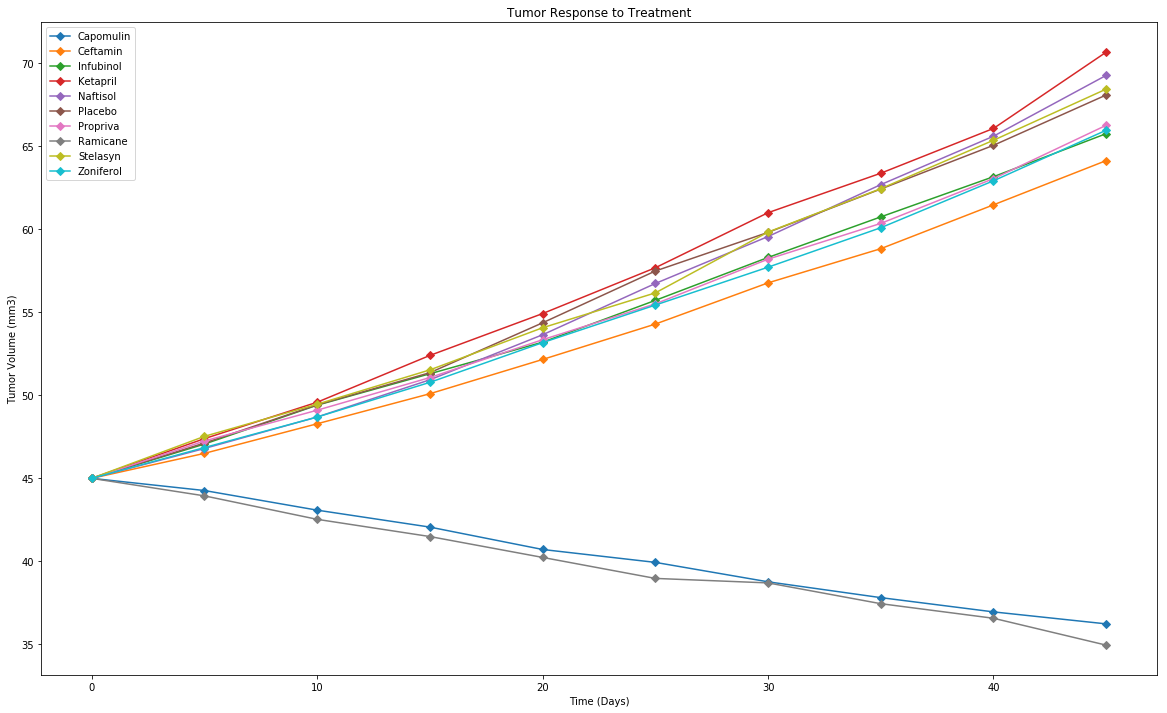

<Figure size 1520x912 with 0 Axes>

In [141]:
# Generate the Plot (with Error Bars)
lines=df.plot(marker="D")
plt.rcParams["figure.figsize"] = (20,12)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='best')


# Save the Figure
plt.savefig('Tumor Response to Treatment')
figure(num=None,figsize=(20,12), dpi=76)
# Show the Figure
#plt.show()

## Metastatic Response to Treatment

In [101]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_by_drug_timepoint=combined_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_df=pd.DataFrame(mean_met_by_drug_timepoint)

# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [102]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met=combined_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_met_df=pd.DataFrame(sem_met)

# Preview DataFrame
sem_met_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [103]:
# Minor Data Munging to Re-Format the Data Frames
met_df=sem_met_df.reset_index().pivot( 'Timepoint','Drug', 'Metastatic Sites')
# Preview that Reformatting worked
met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


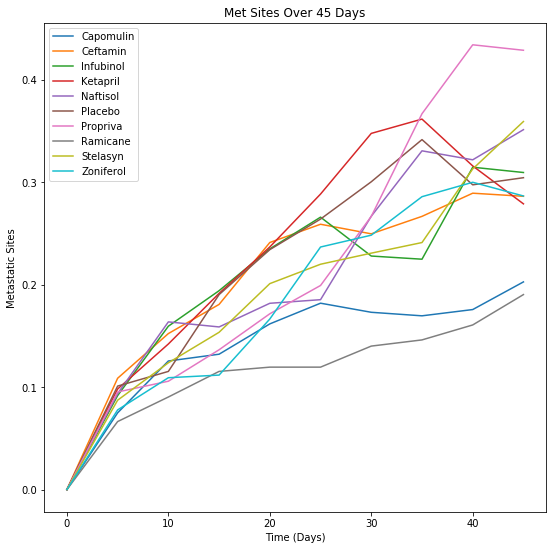

In [142]:
# Generate the Plot (with Error Bars)

# Show the Figure
plt.rcParams["figure.figsize"] = (9,9)
lines=met_df.plot()
plt.title("Met Sites Over 45 Days")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc='best')
# Save the Figure
plt.savefig('Met sites over time')


## Survival Rates

In [109]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
t=combined_data_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
t_df=pd.DataFrame(t)
t_df.reset_index(inplace=True
                 
# Preview DataFrame
print(t)





SyntaxError: invalid syntax (<ipython-input-109-715035b8c117>, line 9)

In [110]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count=t_df.reset_index().pivot( 'Timepoint','Drug', 'Mouse ID')

# Preview the Data Frame
mouse_count.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


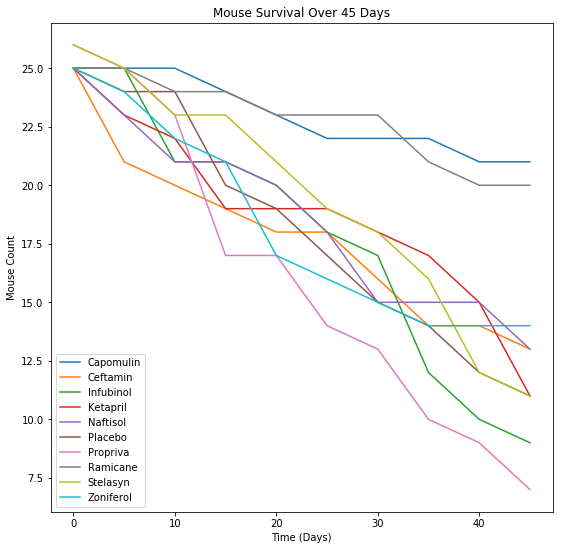

In [143]:
# Generate the Plot (Accounting for percentages)
import matplotlib.ticker as mtick
mouse_count.plot()
plt.rcParams["figure.figsize"] = (9,9)
#perc=np.linspace(0,100,len(t_df))

plt.title("Mouse Survival Over 45 Days")
plt.xlabel("Time (Days)")
plt.ylabel("Mouse Count")
plt.legend(loc='best')
# Save the Figure
plt.savefig('Mouse Survival Over Time')
# Show the Figure
plt.show()


## Summary Bar Graph

In [112]:
# Calculate the percent changes for each drug
#change=df.pct_change(1, limit=None, freq=None).sum()*100
# Display the data to confirm
#change.head(10) #Doesnt work.  Figures are off slightly.


In [113]:
# Calculate the percent changes for each drug
pct_change=((df.iloc[-1]-df.iloc[0])/df.iloc[0])*100
pct_change #This works! Correct values!

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [114]:
pct_change.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [115]:
pct_change.values

array([-19.47530267,  42.51649186,  46.12347173,  57.02879469,
        53.92334713,  51.29796048,  47.24117486, -22.32090046,
        52.08513429,  46.57975087])

In [116]:
pct_change_df=pd.DataFrame(pct_change)
pct_change_df=pct_change_df.reset_index(inplace=False)
pct_change_df


,Drug,0
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [117]:
#testing out formats, confirming results
pct_change_df[0]

0   -19.475303
1    42.516492
2    46.123472
3    57.028795
4    53.923347
5    51.297960
6    47.241175
7   -22.320900
8    52.085134
9    46.579751
Name: 0, dtype: float64

In [118]:
x_axis = np.arange(len(pct_change.values))
x_axis
y=pct_change.values

In [119]:
desired_array = pct_change.astype(np.int64)
desired_array.reset_index()
desired_array
#desired_array_str=np.array(map(str,desired_array))
#list(desired_array_str)
#percent_array=[s+"%" for s in desired_array_str]

Drug
Capomulin   -19
Ceftamin     42
Infubinol    46
Ketapril     57
Naftisol     53
Placebo      51
Propriva     47
Ramicane    -22
Stelasyn     52
Zoniferol    46
dtype: int64

In [120]:
#Testing out ideas on how to display data
new=pct_change_df.filter(['Drug'])

In [121]:
new['Change']=pct_change.values

In [122]:
new


,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


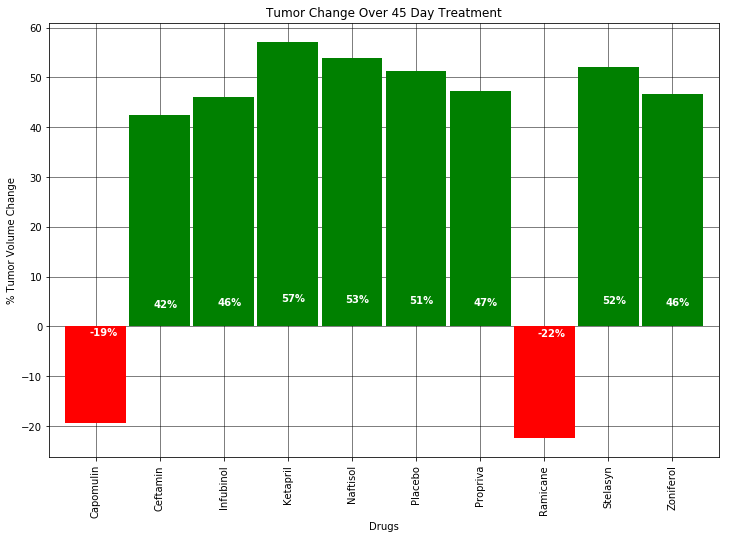

In [131]:
# Store all Relevant Percent Changes into a Tuplpe
# Splice the data between passing and failing drugs
fig,  ax=plt.subplots()
pct_change.plot(kind='bar', width=.95,color=(pct_change<0).map({False: 'g', True:'r'}))
#print(change)
plt.xticks(x_axis, pct_change.index)

# Orient widths. Add labels, tick marks, etc. 
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

ax.set_axisbelow(True)
ax.grid(linestyle='-', linewidth='0.5', color='black',axis="both")
for i in x_axis:
    s1=("{0:.0%}".format(desired_array[i]/100))
    plt.text(x=x_axis[i]-.10,y=(y[i]*1.09)-y[i], s=s1, color='white', fontweight='bold')



# Call functions to implement the function calls


# Save the Figure
plt.savefig('Tumor Change Over 45 Day Treatment')

# Show the Figure
#fig.show()

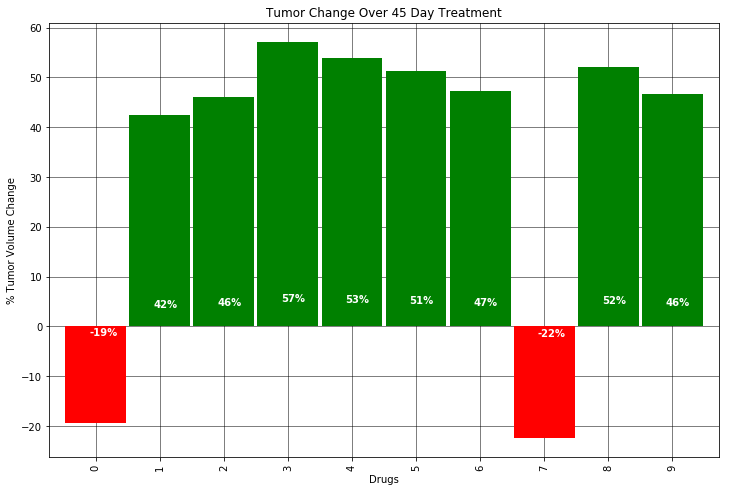

In [145]:
# Store all Relevant Percent Changes into a Tuplpe
# Splice the data between passing and failing drugs
fig,  ax=plt.subplots()
colors=tuple(np.where(pct_change<0, 'r', 'g'))
pct_change.plot(kind='bar', width=.95,color=colors)

plt.xticks(x_axis, new.index)

# Orient widths. Add labels, tick marks, etc. 
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

ax.set_axisbelow(True)
ax.grid(linestyle='-', linewidth='0.5', color='black',axis="both")
for i in x_axis:
    s1=("{0:.0%}".format(desired_array[i]/100))
    plt.text(x=x_axis[i]-.10,y=(y[i]*1.09)-y[i], s=s1, color='white', fontweight='bold')



# Call functions to implement the function calls


# Save the Figure
plt.savefig('Tumor Change Over 45 Day Treatment Plot 2')

# Show the Figure
fig.show()


In [128]:
#print(new['Change'])

## Trends emerging in the Data


The most significant and obvious trend in the data shows two compounds [Capomulin and Ramicane] having a significant impact on tumor volume in the mice tested in those groups.  This is butressed with the mean survival time of the mice in both groups significantly higher than all other study drugs and further supported with an overal lower metastases observed.

A third drug [Zoniferal] appears to show a late stage reduction in tumor volume and prolonged mouse longevity suggesting the drug may impact non-progression of disease and disease stabilization.

It is clear that the trends in tumor size and number of metastices are clear indication of improving mouse health and indicative of theraputic effectiveness.